# DATA ANALYSIS ON "COVID-19" FOR "INDIA"

### TABLE OF CONTENTS
<ol type='1'>
    <li>Loading Dataset
    <li>Subsetting dataset for location = "INDIA"
    <li>Handling Missing Value
    <li>Univariate Analysis
       <ol type='a'>
           <li>Histograms
           <li>Mean of each column
           <li>Median of each column
           <li>Mode of each column
       </ol>
    <li>Bivariate Analysis
       <ol type='a'>
           <li>Scatter-plots
           <li>Line-plots
       </ol>
    <li>Converting 'Date' column to Ordinal
    <li>a.Dropping useless column
        b.Converting Categorical to Numerical by Label Encoder
    <li>Select 'Total_cases' column as Target Variable
    <li>Selecting other columns as Features
    <li>Performing Train-Test Split
    <li>Modelling
        <ol type='a'>
            <li>Linear Regression
            <li>Random Forest Regression
        </ol>
</ol>

In [1]:
#importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
import datetime as dt

## 1. Loading Dataset

### Dataset has been downloaded from provided link as below
#### https://covid.ourworldindata.org/data/owid-covid-data.csv
#### This dataset has been saved in the same directory where this project is saved as "owid-covid-data.csv"

In [2]:
# import csv into dataframe object

df = pd.read_csv("owid-covid-data.csv")

In [3]:
# Check the shape of your data in (rows, columns) format

df.shape

(35297, 36)

## 2. Subsetting dataset for location = "INDIA"

In [4]:
# Extracting only those rows where column value of location is India
# and makin new dataframe for Indian dataset

df_india = df.loc[df['location']=='India']

In [5]:
# Check the shape of your new data in (rows, columns) format

df_india.shape

(220, 36)

## 3. Handling Missing Values

In [6]:
# Exploring how many null values are in each column of your dataset

df_india.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
new_tests                          90
total_tests                        84
total_tests_per_thousand           84
new_tests_per_thousand             90
new_tests_smoothed                 79
new_tests_smoothed_per_thousand    79
tests_per_case                     79
positive_rate                      79
tests_units                        72
stringency_index                    1
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_olde

In [7]:
# Replacing null values by the mean of that column

df_india['new_tests'] = df_india['new_tests'].fillna(df_india['new_tests'].mean(axis=0, skipna=True))
df_india['total_tests'] = df_india['total_tests'].fillna(df_india['total_tests'].mean(axis=0, skipna=True))
df_india['total_tests_per_thousand'] = df_india['total_tests_per_thousand'].fillna(df_india['total_tests_per_thousand'].mean(axis=0, skipna=True))
df_india['new_tests_per_thousand'] = df_india['new_tests_per_thousand'].fillna(df_india['new_tests_per_thousand'].mean(axis=0, skipna=True))
df_india['new_tests_smoothed'] = df_india['new_tests_smoothed'].fillna(df_india['new_tests_smoothed'].mean(axis=0, skipna=True))
df_india['new_tests_smoothed_per_thousand'] = df_india['new_tests_smoothed_per_thousand'].fillna(df_india['new_tests_smoothed_per_thousand'].mean(axis=0, skipna=True))
df_india['tests_per_case'] = df_india['tests_per_case'].fillna(df_india['tests_per_case'].mean(axis=0, skipna=True))
df_india['positive_rate'] = df_india['positive_rate'].fillna(df_india['positive_rate'].mean(axis=0, skipna=True))
df_india['tests_units'] = df_india['tests_units'].fillna("samples tested")
df_india['stringency_index'] = df_india['stringency_index'].fillna(df_india['stringency_index'].mean(axis=0, skipna=True))

D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [8]:
# Exploring how many null values are in each column of your dataset

df_india.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
g

## 4. Univariate Analysis

### a. Histogram

[]

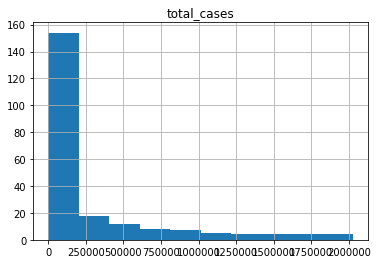

In [9]:
df_india.total_cases.hist()
plt.title("total_cases")
plt.plot()

[]

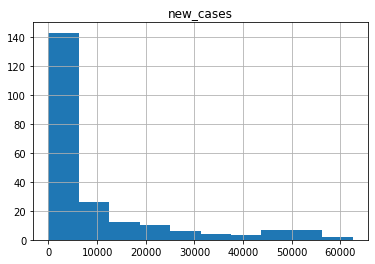

In [10]:
df_india.new_cases.hist()
plt.title("new_cases")
plt.plot()

[]

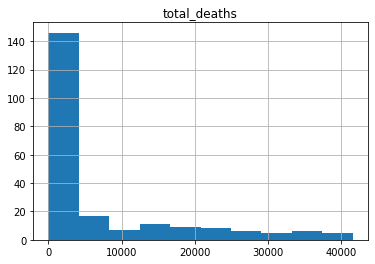

In [11]:
df_india.total_deaths.hist()
plt.title("total_deaths")
plt.plot()

[]

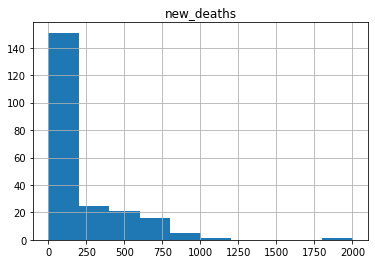

In [12]:
df_india.new_deaths.hist()
plt.title("new_deaths")
plt.plot()

[]

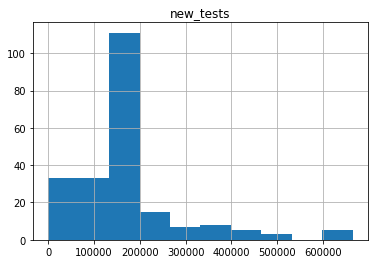

In [13]:
df_india.new_tests.hist()
plt.title("new_tests")
plt.plot()

[]

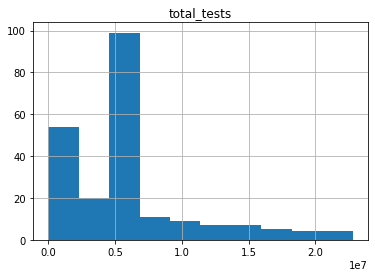

In [14]:
df_india.total_tests.hist()
plt.title("total_tests")
plt.plot()

[]

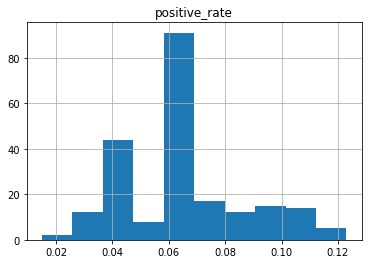

In [15]:
df_india.positive_rate.hist()
plt.title("positive_rate")
plt.plot()

[]

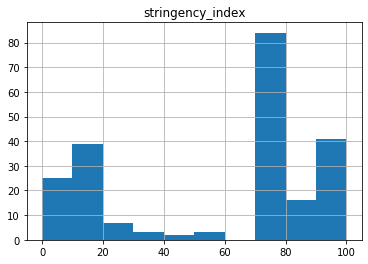

In [16]:
df_india.stringency_index.hist()
plt.title("stringency_index")
plt.plot()

[]

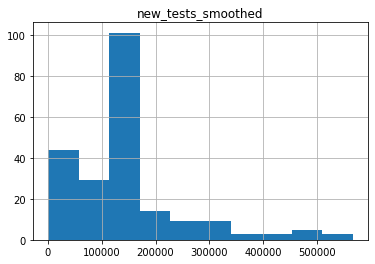

In [17]:
df_india.new_tests_smoothed.hist()
plt.title("new_tests_smoothed")
plt.plot()

[]

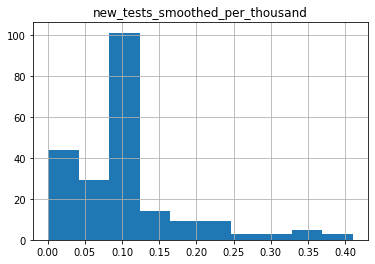

In [18]:
df_india.new_tests_smoothed_per_thousand.hist()
plt.title("new_tests_smoothed_per_thousand")
plt.plot()

### b. Mean of each column

In [19]:
df_india.mean()

total_cases                        2.666034e+05
new_cases                          9.213973e+03
total_deaths                       6.769382e+03
new_deaths                         1.890227e+02
total_cases_per_million            1.931902e+02
new_cases_per_million              6.676764e+00
total_deaths_per_million           4.905336e+00
new_deaths_per_million             1.369636e-01
new_tests                          1.742577e+05
total_tests                        5.955752e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 1.485289e+05
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   5.825808e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

### c. Median of each column

In [20]:
df_india.median()

total_cases                        1.648850e+04
new_cases                          1.334500e+03
total_deaths                       5.250000e+02
new_deaths                         3.900000e+01
total_cases_per_million            1.194800e+01
new_cases_per_million              9.670000e-01
total_deaths_per_million           3.800000e-01
new_deaths_per_million             2.850000e-02
new_tests                          1.742577e+05
total_tests                        5.955752e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 1.485289e+05
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   7.639000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989

### d. Mode of each column

In [21]:
df_india.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,NaN,NaN,NaN,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,2020-08-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Bivariate Analysis

### a. Scatter-plot of "total_cases" vs 10 features

Text(0, 0.5, 'new_cases')

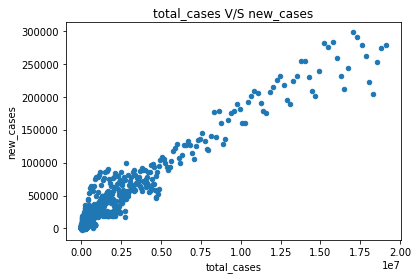

In [22]:
df.plot.scatter(x="total_cases",y="new_cases")
plt.title("total_cases V/S new_cases")
plt.xlabel("total_cases")
plt.ylabel("new_cases")

Text(0, 0.5, 'total_deaths')

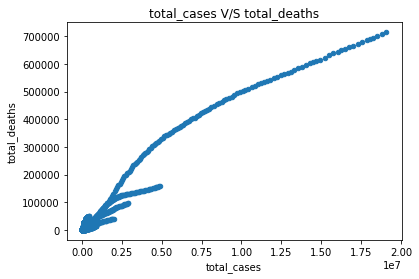

In [23]:
df.plot.scatter(x="total_cases",y="total_deaths")
plt.title("total_cases V/S total_deaths")
plt.xlabel("total_cases")
plt.ylabel("total_deaths")

Text(0, 0.5, 'new_deaths')

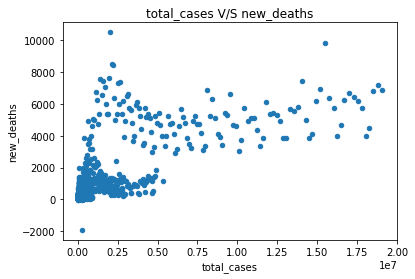

In [24]:
df.plot.scatter(x="total_cases",y="new_deaths")
plt.title("total_cases V/S new_deaths")
plt.xlabel("total_cases")
plt.ylabel("new_deaths")

Text(0, 0.5, 'new_tests')

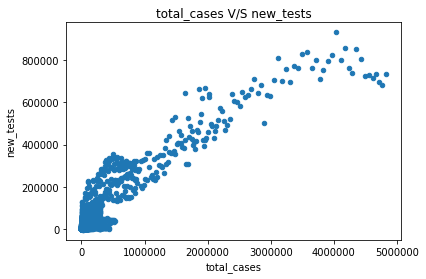

In [25]:
df.plot.scatter(x="total_cases",y="new_tests")
plt.title("total_cases V/S new_tests")
plt.xlabel("total_cases")
plt.ylabel("new_tests")

Text(0, 0.5, 'total_tests')

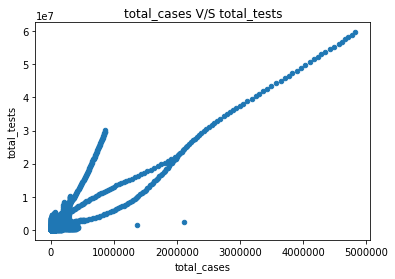

In [26]:
df.plot.scatter(x="total_cases",y="total_tests")
plt.title("total_cases V/S total_tests")
plt.xlabel("total_cases")
plt.ylabel("total_tests")

Text(0, 0.5, 'new_tests_smoothed')

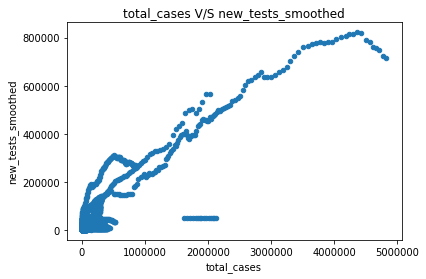

In [27]:
df.plot.scatter(x="total_cases",y="new_tests_smoothed")
plt.title("total_cases V/S new_tests_smoothed")
plt.xlabel("total_cases")
plt.ylabel("new_tests_smoothed")

Text(0, 0.5, 'tests_per_case')

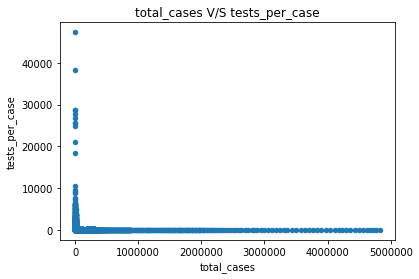

In [28]:
df.plot.scatter(x="total_cases",y="tests_per_case")
plt.title("total_cases V/S tests_per_case")
plt.xlabel("total_cases")
plt.ylabel("tests_per_case")

Text(0, 0.5, 'positive_rate')

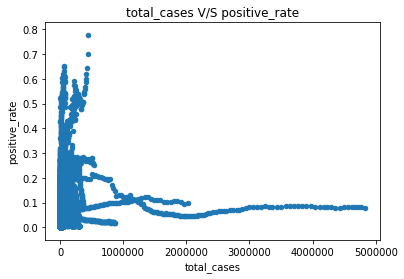

In [29]:
df.plot.scatter(x="total_cases",y="positive_rate")
plt.title("total_cases V/S positive_rate")
plt.xlabel("total_cases")
plt.ylabel("positive_rate")

Text(0, 0.5, 'stringency_index')

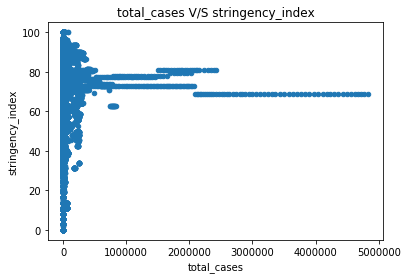

In [30]:
df.plot.scatter(x="total_cases",y="stringency_index")
plt.title("total_cases V/S stringency_index")
plt.xlabel("total_cases")
plt.ylabel("stringency_index")

Text(0, 0.5, 'life_expectancy')

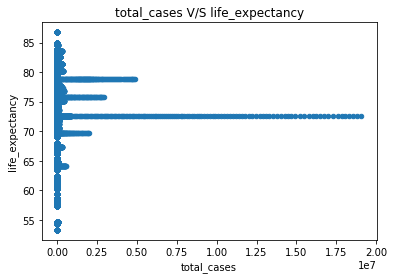

In [31]:
df.plot.scatter(x="total_cases",y="life_expectancy")
plt.title("total_cases V/S life_expectancy")
plt.xlabel("total_cases")
plt.ylabel("life_expectancy")

### b. Line-plot of "total_cases" vs 10 features

Text(0, 0.5, 'new_cases')

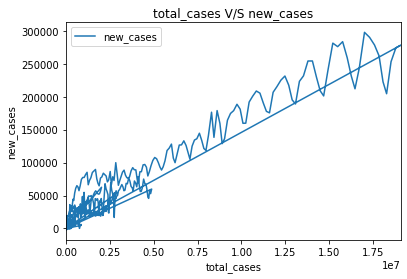

In [32]:
df.plot.line(x="total_cases",y="new_cases")
plt.title("total_cases V/S new_cases")
plt.xlabel("total_cases")
plt.ylabel("new_cases")

Text(0, 0.5, 'total_deaths')

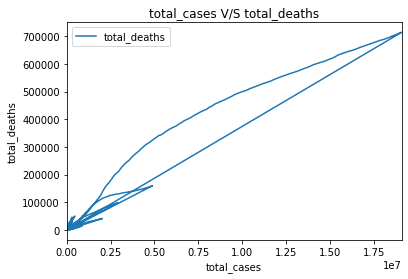

In [33]:
df.plot.line(x="total_cases",y="total_deaths")
plt.title("total_cases V/S total_deaths")
plt.xlabel("total_cases")
plt.ylabel("total_deaths")

Text(0, 0.5, 'new_deaths')

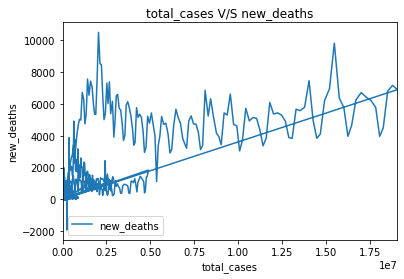

In [34]:
df.plot.line(x="total_cases",y="new_deaths")
plt.title("total_cases V/S new_deaths")
plt.xlabel("total_cases")
plt.ylabel("new_deaths")

Text(0, 0.5, 'new_tests')

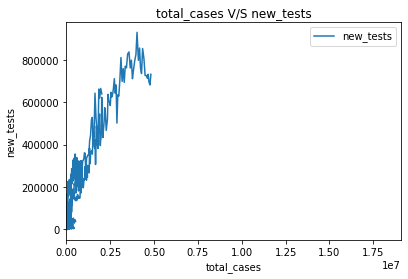

In [35]:
df.plot.line(x="total_cases",y="new_tests")
plt.title("total_cases V/S new_tests")
plt.xlabel("total_cases")
plt.ylabel("new_tests")

Text(0, 0.5, 'total_tests')

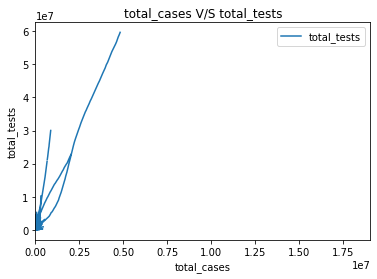

In [36]:
df.plot.line(x="total_cases",y="total_tests")
plt.title("total_cases V/S total_tests")
plt.xlabel("total_cases")
plt.ylabel("total_tests")

Text(0, 0.5, 'new_tests_smoothed')

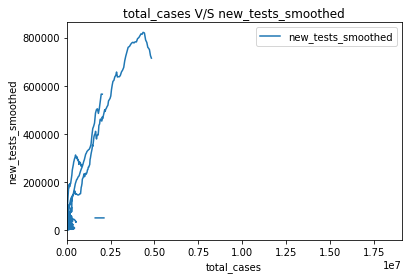

In [37]:
df.plot.line(x="total_cases",y="new_tests_smoothed")
plt.title("total_cases V/S new_tests_smoothed")
plt.xlabel("total_cases")
plt.ylabel("new_tests_smoothed")

Text(0, 0.5, 'tests_per_case')

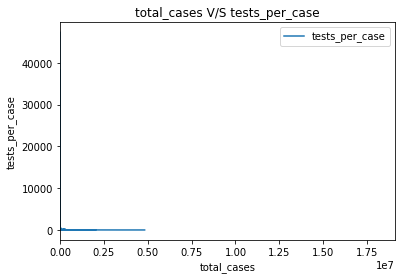

In [38]:
df.plot.line(x="total_cases",y="tests_per_case")
plt.title("total_cases V/S tests_per_case")
plt.xlabel("total_cases")
plt.ylabel("tests_per_case")

Text(0, 0.5, 'positive_rate')

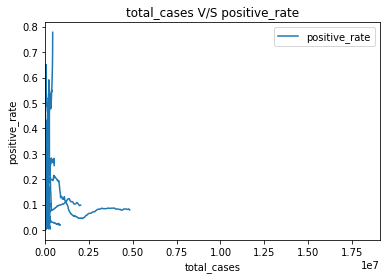

In [39]:
df.plot.line(x="total_cases",y="positive_rate")
plt.title("total_cases V/S positive_rate")
plt.xlabel("total_cases")
plt.ylabel("positive_rate")

Text(0, 0.5, 'stringency_index')

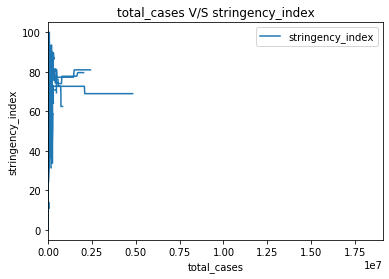

In [40]:
df.plot.line(x="total_cases",y="stringency_index")
plt.title("total_cases V/S stringency_index")
plt.xlabel("total_cases")
plt.ylabel("stringency_index")

Text(0, 0.5, 'life_expectancy')

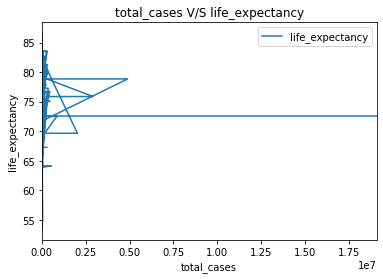

In [41]:
df.plot.line(x="total_cases",y="life_expectancy")
plt.title("total_cases V/S life_expectancy")
plt.xlabel("total_cases")
plt.ylabel("life_expectancy")

## 6. Converting date column to ordinal

In [42]:
df_india['date'] = pd.to_datetime(df_india['date'])
df_india['date'] = df_india['date'].map(dt.datetime.toordinal)

D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 7.a. Droping useless Columns = ['iso_code', 'continent', 'location']

In [43]:
df_india = df_india.drop(columns= ['iso_code', 'continent', 'location'])

In [44]:
df_india

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15127,737424,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15128,737425,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15129,737426,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15130,737427,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15131,737428,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,737640,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,27.634,0.559,381027.000000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15343,737641,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,28.216,0.582,661892.000000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15344,737642,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,28.837,0.621,619652.000000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15345,737643,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,29.492,0.655,664949.000000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


## 7.b. Converting Categorical to Numerical by LabelEncoder

In [45]:
df_india['tests_units'] = df_india['tests_units'].astype('category')
df_india['tests_units'] = df_india['tests_units'].cat.codes

## 8. Select "total_cases" column as target variable

## 9. Selecting other columns as features

## 10. Performing Train-Test Split

In [46]:
y = df_india.total_cases
x = df_india.drop("total_cases",axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15286,737584,9983.0,7135.0,206.0,185.949,7.234,5.170,0.149,108048.000000,4.774434e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15207,737505,40.0,4.0,0.0,0.167,0.029,0.003,0.000,1325.000000,1.570100e+04,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15289,737587,9996.0,8102.0,357.0,207.665,7.243,5.871,0.259,151808.000000,5.213140e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15136,737433,0.0,0.0,0.0,0.000,0.000,0.000,0.000,174257.730769,5.955752e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15222,737520,472.0,77.0,9.0,2.445,0.342,0.056,0.007,9584.000000,8.953400e+04,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [47]:
x_train.shape

(176, 32)

## 11. Modelling

### a. Linear Regression

In [48]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
date,3.049649e-03
new_cases,-1.327621e-01
total_deaths,-6.622473e-02
new_deaths,-4.784033e-02
total_cases_per_million,1.380005e+03
new_cases_per_million,1.831712e+02
total_deaths_per_million,9.139503e+01
new_deaths_per_million,6.606258e+01
new_tests,-1.194112e-05
total_tests,8.015546e-05


In [50]:
y_pred = regressor.predict(x_test)

In [51]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff

,Actual,Predicted
15234,13387.0,1.338751e+04
15151,0.0,8.430323e-02
15238,18600.0,1.859973e+04
15332,1287945.0,1.287945e+06
15276,165799.0,1.657993e+05
15166,3.0,2.869892e+00
15273,145380.0,1.453793e+05
15142,0.0,5.685639e-02
15157,1.0,1.512850e+00
15148,0.0,7.515428e-02


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2774487206775327
Mean Squared Error: 0.12347690634481516
Root Mean Squared Error: 0.3513928091819967


### Random-Forest Regression

In [53]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [54]:
y_pred = regressor.predict(x_test)

In [55]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff

,Actual,Predicted
15234,13387.0,13036.25
15151,0.0,0.00
15238,18600.0,18400.85
15332,1287945.0,1293826.48
15276,165799.0,164388.49
15166,3.0,3.00
15273,145380.0,143502.38
15142,0.0,0.00
15157,1.0,0.94
15148,0.0,0.00
